In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import joblib, json, sys, os
from IPython.display import Image, display_png

sys.path.append("script/")
from MergeBrain import WholeBrainCells

### Build and Install CUBIC-informatics

See README.md at https://github.com/lsb-riken/CUBIC-informatics

### Download test data

from http://cubic-atlas.riken.jp/

It includes a single stack 100 images and parameter files.

You need to modify the parameter files:
 * the path to the downloaded images (param_test_FW.json, param_test_RV.json)
 * the location to save the results (param_test_FW.json, param_test_RV.json, param_test_merge.json, param_test_classify.json)

### Run HDoG_gpu.py
```
$ python script/HDoG_gpu.py param/param_test_FW.json

$ python script/HDoG_gpu.py param/param_test_RV.json
```

### Run MergeBrain.py
```
$ python script/MergeBrain.py cells param/param_test_merge.json
```

### Run HDoG_classifier.py
```
$ python script/HDoG_classifier.py param/param_test_classify.json
```

In [2]:
# load results
wbc = WholeBrainCells("param/param_test_merge.json")
stack = wbc.halfbrain_cells_RV.get_stack_by_xyname(xname="123830", yname="096940")

with open("param/param_test_classify.json") as f:
    param_clf = json.load(f)
data_classified = joblib.load(os.path.join(param_clf["dst_basedir"], "RV/096940_123830.pkl"))


[*] Initializing WholeBrain(param/param_test_merge.json)
[*] Initializing HalfbrainImages(./param/param_test_FW.json)
[*] Initializing HalfbrainImages(./param/param_test_RV.json)
[*] adding dummy images...
	 boundary for FW (200050) at i=None
	 boundary for RV (200050) at i=0
[*] Precomputng param header for FW
	 downscale ratio for xy : 0.01625
	 downscale ratio for z : 0.125 (skip=8)
	 original: 2560 x 2160 x (12 x 16)
	 strip: 1960 x 2360 x (12 x 16)
	 sampled: 31 x 38 x (12 x 16)
	 merged: 372 x 608
	 actual downscale ratio : 0.0158163 x 0.0161017
	 merged_mergin: L:1.610 R:1.610 T:1.582 B:1.582
[*] Precomputng param header for RV
	 downscale ratio for xy : 0.01625
	 downscale ratio for z : 0.125 (skip=8)
	 original: 2560 x 2160 x (12 x 16)
	 strip: 1960 x 2360 x (12 x 16)
	 sampled: 31 x 38 x (12 x 16)
	 merged: 372 x 608
	 actual downscale ratio : 0.0158163 x 0.0161017
	 merged_mergin: L:1.610 R:1.610 T:1.582 B:1.582

[*] Initializing CellHalfBrain(./param/param_test_FW.json)
<c

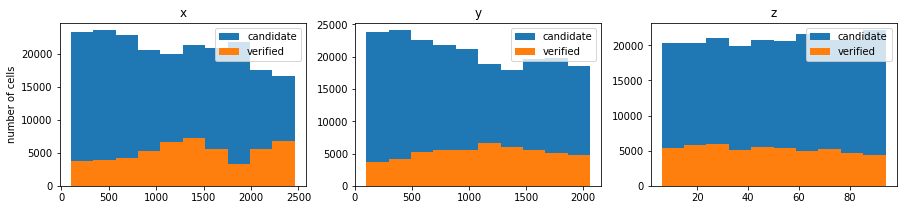

In [3]:
fig = plt.figure(figsize=(15,3))
fig.add_subplot(1,3,1)
plt.hist(stack.data_local["local_x"], label="candidate")
plt.hist(stack.data_local["local_x"][data_classified["is_positive"]], label="verified")
plt.title("x")
plt.ylabel("number of cells")
plt.legend()
fig.add_subplot(1,3,2)
plt.hist(stack.data_local["local_y"], label="candidate")
plt.hist(stack.data_local["local_y"][data_classified["is_positive"]], label="verified")
plt.title("y")
plt.legend()
fig.add_subplot(1,3,3)
plt.hist(stack.data_local["local_z"], label="candidate")
plt.hist(stack.data_local["local_z"][data_classified["is_positive"]], label="verified")
plt.title("z")
plt.legend()

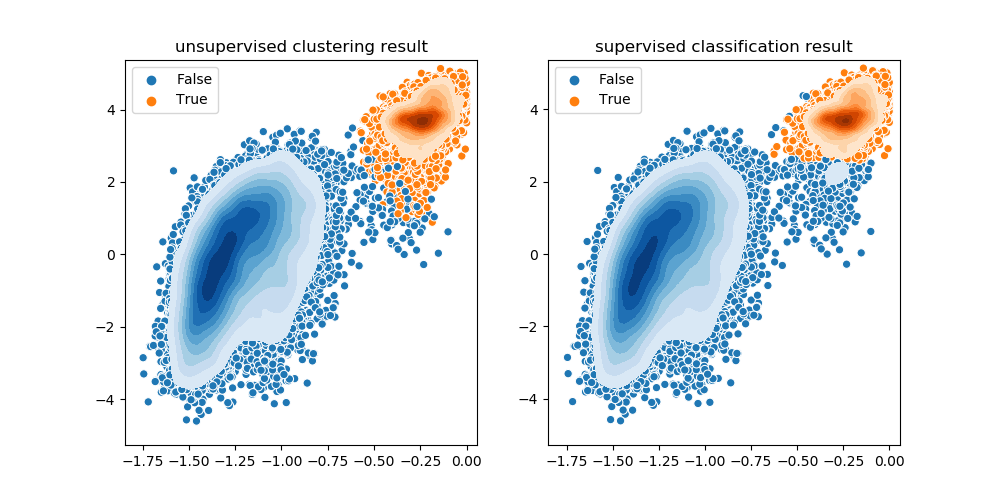

In [4]:
display_png(Image(os.path.join(param_clf["dst_basedir"], "feature_space_clf_dt.png")))

In [5]:
img = stack.get_stack_src_img()

/export2/Imaging/test/RV/096940/096940_123830
	number of images:100


In [6]:
def plot_cells_on_image(i=50, d=1, s=1):
    in_slice_positive = np.bitwise_and(
        data_classified["is_positive"],
        np.bitwise_and(
            stack.data_local["local_z"] >= i-d,
            stack.data_local["local_z"] <= i+d
        )
    )
    fig = plt.figure(figsize=(10,10))
    plt.imshow(img[i])
    plt.scatter(stack.data_local["local_x"][in_slice_positive],
               stack.data_local["local_y"][in_slice_positive], s=s, c="r")
    


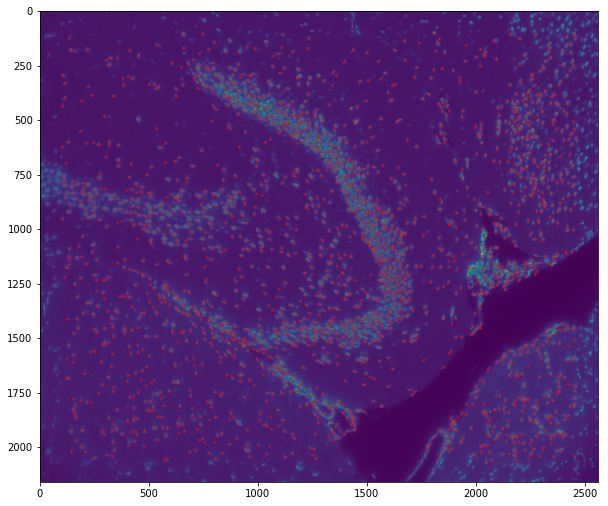

In [7]:
plot_cells_on_image(50, d=2)